In [87]:
#Starting off by importing the library 
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)

In [88]:
#Doing this to open up the data
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

head(players)
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [104]:
#Number of rows and columns for the data 
tibble(
  dataset = c("players", "sessions"),
  n_rows  = c(nrow(players), nrow(sessions)),
  n_cols  = c(ncol(players), ncol(sessions))
)

#Summary Statistics (using round function to set values around 2 decimal places)
player_summary <- players |>
    summarize(
    mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2),
    min_played_hours = round(min(played_hours, na.rm = TRUE), 2),
    max_played_hours = round(max(played_hours, na.rm = TRUE), 2),
    mean_age = round(mean(Age, na.rm = TRUE), 2),
    min_age = round(min(Age, na.rm = TRUE), 2),
    max_age = round(max(Age, na.rm = TRUE), 2))
player_summary 


sessions_summary <- sessions |>
    mutate(session_length = original_end_time - original_start_time)|>
  summarize(
    mean_session = mean(session_length, na.rm = TRUE),
    max_session = max(session_length, na.rm = TRUE))
sessions_summary


dataset,n_rows,n_cols
<chr>,<int>,<int>
players,196,7
sessions,1535,5


mean_played_hours,min_played_hours,max_played_hours,mean_age,min_age,max_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.85,0,223.1,21.14,9,58


mean_session,max_session
<dbl>,<dbl>
2909328,2e+07


What the variables mean in the player.csv dataset
expereince: This is a character variable that indicates the level of experience the indivudal has on the Minecraft server (Begginner, Pro, Amateur, Regular, Vetran)

subscribe: This is logical variable that tells if the player is subscribed or not (either TRUE/FALSE)

hashedEmail : This is a character variable that gives information on the players email address, however there is no context provided on what the numbers mean and its hard to interpet so I dont think its a good variable to use in the analysis 

played_hours: This is double variable that provides the amount of time each player has logged onto the server 

name: This is a character variable that states the name of the player

gender: This is a character variable that states the gender category of the player

age: This is a double variable that states the specific age of the player at the time of playing on the server 

What the variables mean in the sessions.csv dataset
hashedEmail : This is a character variable that gives information on the players email address, however there is no context provided on what the numbers mean and its hard to interpet so I dont think its a good variable to use in the analysis 

start_time :This is a character variable that provides the time and date when the player logged onto the server

end_time:This is a character variable that provides the time and date when the player logged off the server

original_start_time: This is a double variable that povides a unitless number for when the player logged onto the server

originial_end_time: This is a double variable that povides a unitless number for when the player logged off the server

*Both original_start_time and originial_end_time are not ideal to use because of the large number of decimals associated with each one and since its unitless, it would be hard to mutate it to a unit variable.  

---------------------------------------------------------------------------------------------------Part 2 -----------------------------------------------------------------------------------

One broad question that I am going to address: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts. In my specific context I am going to predict whether specific player demographics in the “player.csv” data set (gender, age, experience) can predict how many hours they have played on the server. The data at this point doesn't need to be wrangled and I am going to plot each one of these variables individually on either bar plots (for gender and experience) or scatterplots(for age). Organizing/observing the data in this manner will allow me to see the generalized trends between the variables and their relationships (strong positive, strong negative, etc). 




---------------------------------------------------------------------------------------------------Part 3 -----------------------------------------------------------------------------------

Age,mean_hours
<dbl>,<dbl>
9,30.30
10,3.60
11,2.90
12,0.50
14,8.70
15,0.10
16,50.03
17,4.89
18,0.23


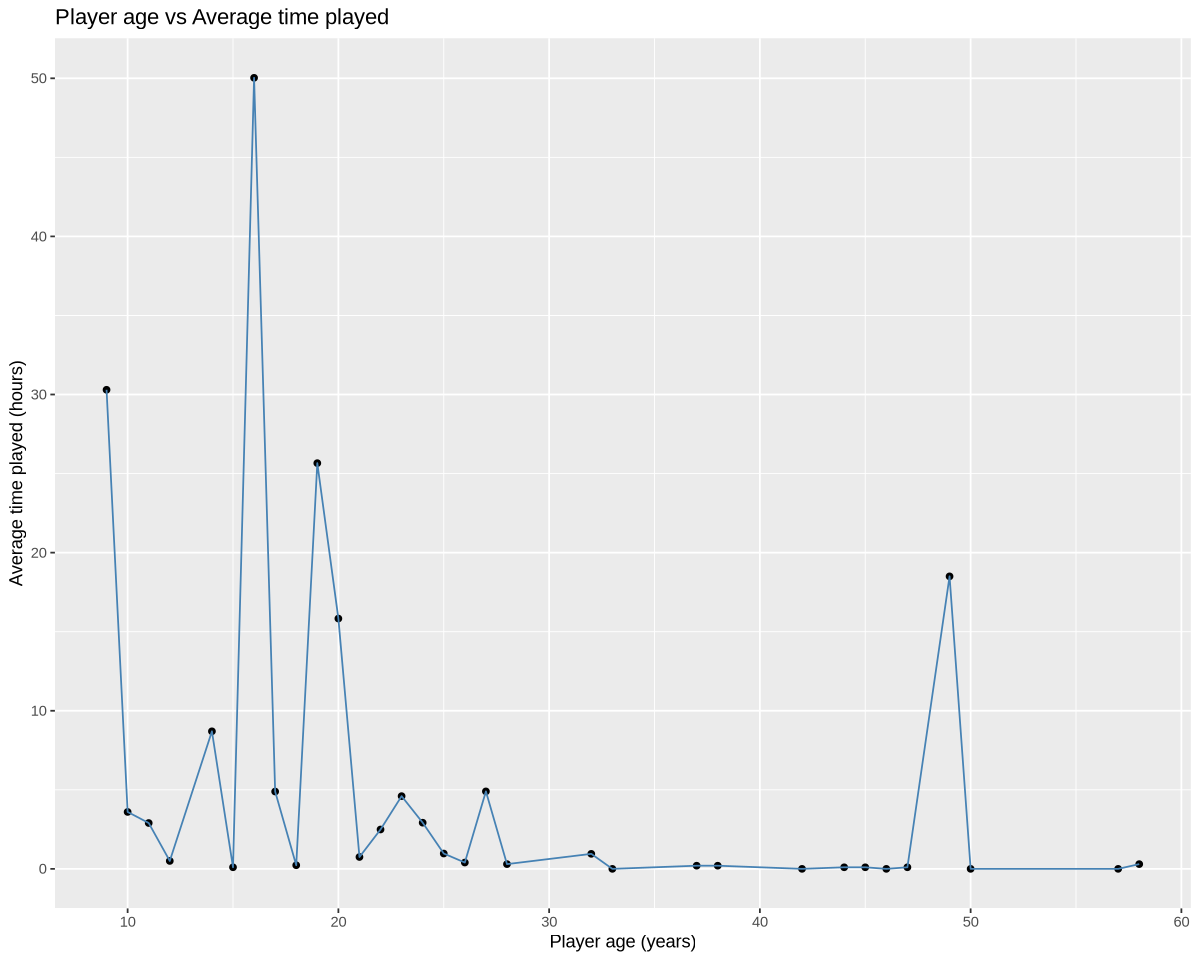

In [90]:
#Start with filtering all data that has the age variable and then find the mean hours
age_summary <- players |>
  filter(!is.na(Age)) |>
  group_by(Age) |>
  summarize(mean_hours = round(mean(played_hours, na.rm = TRUE), 2))
age_summary

#Plot the data in a scatterplot with a line, remove all non permissible data by using na.rm=TRUE
age_plot <- ggplot(age_summary, aes(x=Age, y = mean_hours)) +
            geom_point(na.rm=TRUE)+
            geom_line(color="steelblue", na.rm=TRUE)+
            labs(x= "Player age (years)", y = "Average time played (hours)", title = "Player age vs Average time played")
age_plot

What is the relationship between these two variables?
Based on the plot above, we can see that the highest points on the graph are with individuals between the ages of 10 to 20 years old. Past that specific age group, we can see that the average time played for most groups is below the 20 hour mark. 

gender,mean_hours
<chr>,<dbl>
Agender,6.25
Female,10.64
Male,4.13
Non-binary,14.88
Other,0.20
Prefer not to say,0.37
Two-Spirited,0.08


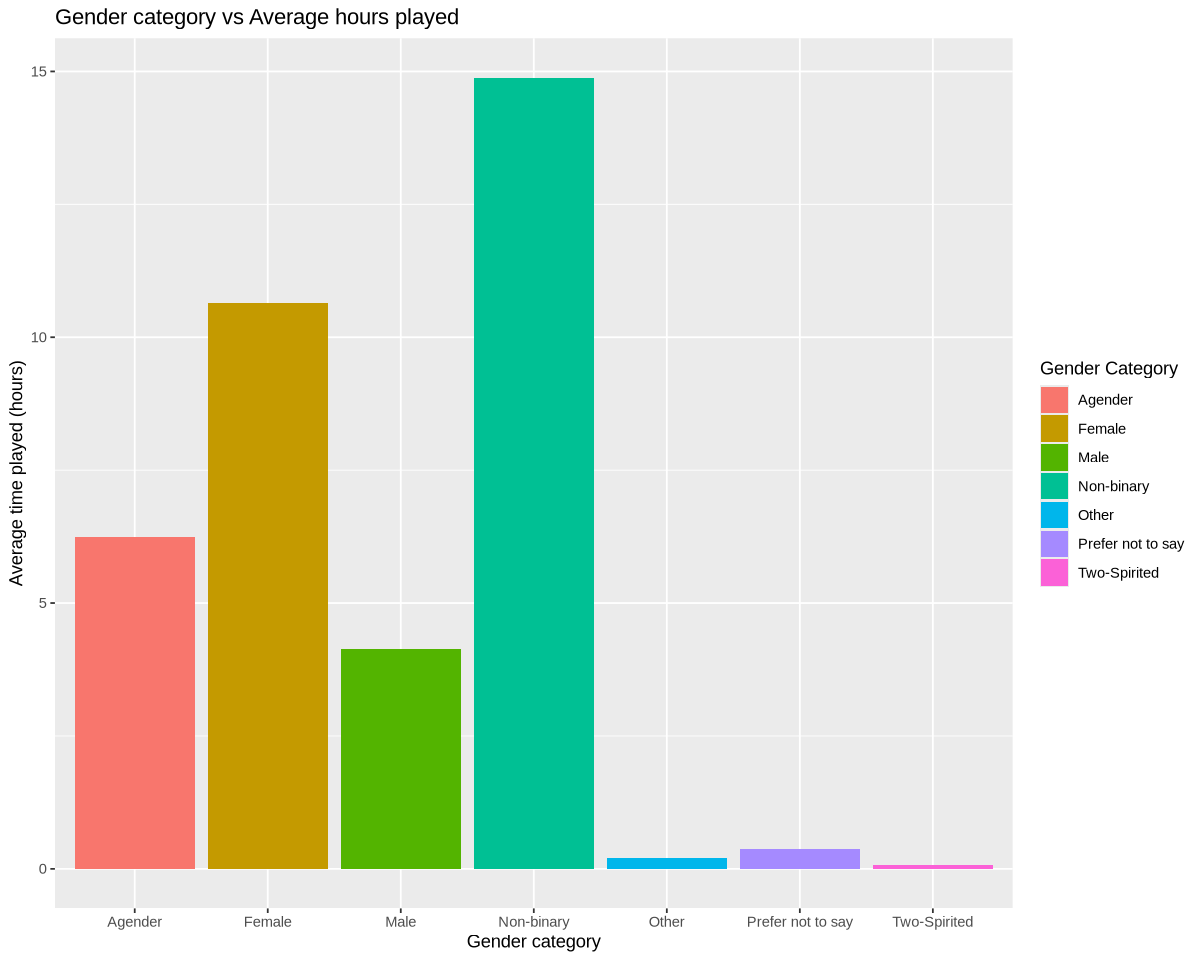

In [107]:
options(repr.plot.width = 10, repr.plot.height = 8)

#Start by grouping the genders and then finding the mean hours played for each gender category
players_gender<- players |>
  group_by(gender) |>
  summarize(mean_hours = round(mean(played_hours, na.rm = TRUE),2))
players_gender

#Plotting the data out on a easy to view bar plot
gender_plot <- ggplot(players_gender, aes(x=gender, y= mean_hours, fill = gender)) +
               geom_bar(stat= "identity")+
               labs(x= "Gender category", y = "Average time played (hours)", fill = "Gender Category", title = "Gender category vs Average hours played") 
gender_plot

Based on the plot above, the gender category with the highest average playtime is the non-binary caterogry (Female at 2nd and Agender at third). 

experience,mean_hours_exp
<chr>,<dbl>
Amateur,6.02
Beginner,1.25
Pro,2.60
Regular,18.21
Veteran,0.65


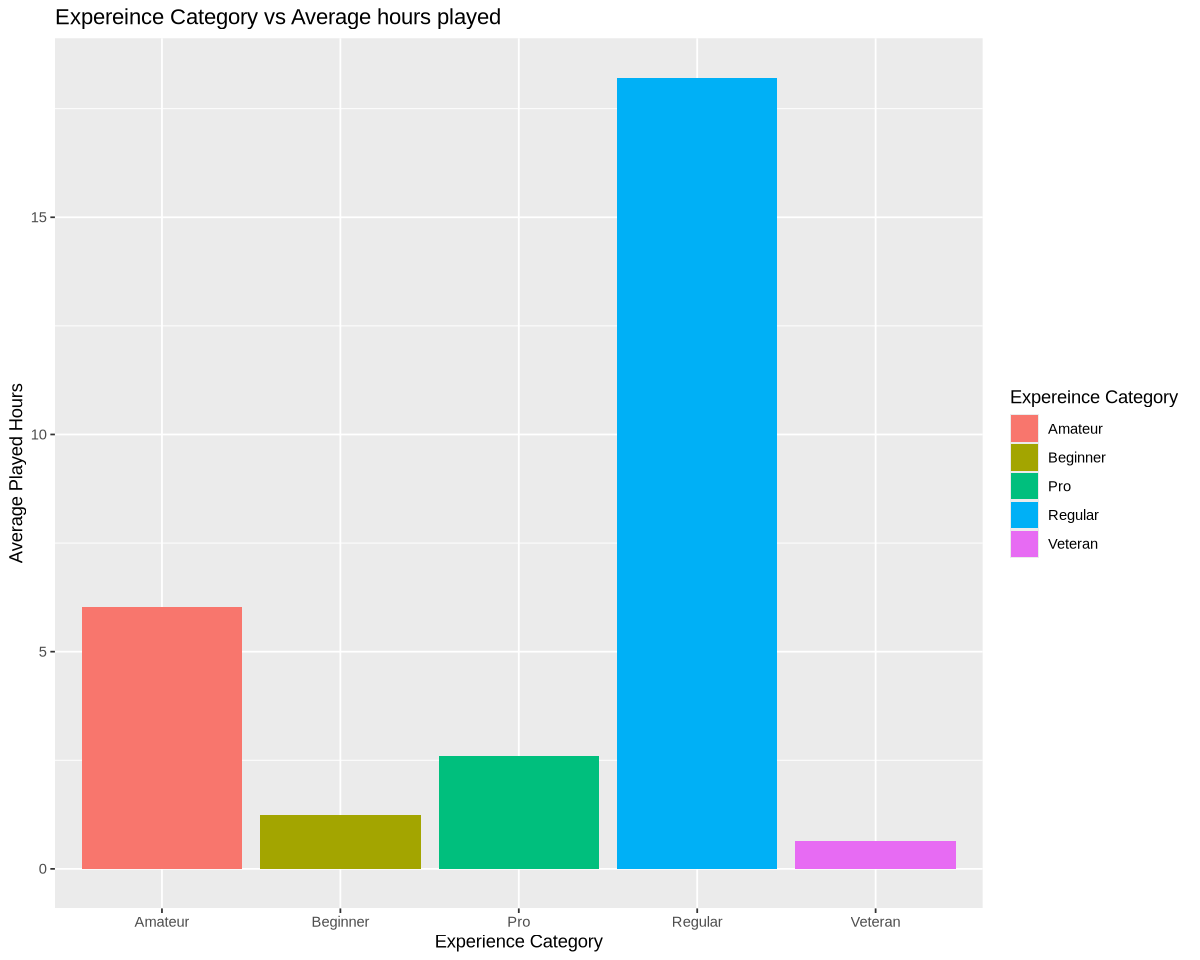

In [108]:
options(repr.plot.width = 10, repr.plot.height = 8)

#Start by grouping the experience and then finding the mean hours played for each expereince category 
players_experience <- players |>
  group_by(experience) |>
  summarize(mean_hours_exp = round(mean(played_hours, na.rm = TRUE),2))
players_experience

#Plotting the data out on a easy to view bar plot
experience_plot <- ggplot(players_experience, aes(x=experience, y= mean_hours_exp, fill = experience)) +
               geom_bar(stat= "identity")+
               labs(x= "Experience Category", y = "Average Played Hours", fill = "Expereince Category", title = "Expereince Category vs Average hours played")
experience_plot

Based on the plot above, we can see that the players with the highest average play time fall under the "Regular" experience category at 15 hours, which is much higher than second place (Amateur at around 6 hours). There also does not appear to be any correlation with the ranking of each catergory > it would be reasonable to assume that the pro's would have the highest average played hours but in this case we dont see that. 

Plot observation summary: Using the initnal inference by observing the plots above, we can begin to piece together which specific group in our predictors have the highest average played hours. We can use this information for future statistical inference. 